#  Chapter 5 Notebook - Analysis Using Visualisations

# Import all libraries

In [1]:
# imports all libraries in one place to use throughout code cells
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# the following are visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats

In [2]:
# plot height variables for most plots in this notebook
# allows plots to be adjusted to user preferences
plot_small = 4
plot_height = 8
plot_rectangle = [12,8]
plot_large_rectangle = [16,8]

# Import dataset

In [3]:
# import the dataset from same directory as the notebook
# dataset link: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv
df = pd.read_csv('heart.csv')

# Perform checks on the dataset

In [4]:
df.shape

(303, 14)

In [5]:
# see what the column header names are
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

These column headers are indecipherable for someone looking to build on this notebook. We need to change these so they are easily understood. The semantic information of what each column represents is with the data on the kaggle link above.

The column 'output' is our metric of value for this dataset, this will be changed to 'chance_of_heart_attack'.

In [6]:
# change column header names
# the full column information was found with the dataset source.
df.rename(columns={
    'sex' : 'Gender',
    'cp': 'Chest pain type', 
    'trtbps': 'Resting blood pressure mm/Hg', 
    'chol' : 'Cholesterol in mg/dl',
    'fbs' : 'Fasting blood sugar > 120mg/dl',
    'restecg' : 'Resting ECG result',
    'thalachh' : 'Max heart rate achieved',
    'exng' : 'Excercise induced angina?',
    'oldpeak' : 'Previous Peak',
    'slp' : 'Slope',
    'caa' : ' Major vessel count',
    'thall' : 'Thall Rate',
    'output' : 'chance_of_heart_attack'}, 
inplace=True)

In [7]:
df.columns

Index(['age', 'Gender', 'Chest pain type', 'Resting blood pressure mm/Hg',
       'Cholesterol in mg/dl', 'Fasting blood sugar > 120mg/dl',
       'Resting ECG result', 'Max heart rate achieved',
       'Excercise induced angina?', 'Previous Peak', 'Slope',
       ' Major vessel count', 'Thall Rate', 'chance_of_heart_attack'],
      dtype='object')

In [8]:
# visualize the top of the dataset
df.head()

,age,Gender,Chest pain type,Resting blood pressure mm/Hg,Cholesterol in mg/dl,Fasting blood sugar > 120mg/dl,Resting ECG result,Max heart rate achieved,Excercise induced angina?,Previous Peak,Slope,Major vessel count,Thall Rate,chance_of_heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# and now look at the tail to make sure it looks ok.
df.tail()

,age,Gender,Chest pain type,Resting blood pressure mm/Hg,Cholesterol in mg/dl,Fasting blood sugar > 120mg/dl,Resting ECG result,Max heart rate achieved,Excercise induced angina?,Previous Peak,Slope,Major vessel count,Thall Rate,chance_of_heart_attack
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# check each columns datatype and number of null values.
# this lets us quickly know how many values are missing and what the datatypes are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             303 non-null    int64  
 1   Gender                          303 non-null    int64  
 2   Chest pain type                 303 non-null    int64  
 3   Resting blood pressure mm/Hg    303 non-null    int64  
 4   Cholesterol in mg/dl            303 non-null    int64  
 5   Fasting blood sugar > 120mg/dl  303 non-null    int64  
 6   Resting ECG result              303 non-null    int64  
 7   Max heart rate achieved         303 non-null    int64  
 8   Excercise induced angina?       303 non-null    int64  
 9   Previous Peak                   303 non-null    float64
 10  Slope                           303 non-null    int64  
 11   Major vessel count             303 non-null    int64  
 12  Thall Rate                      303 

We can see that of 303 rows of data, none of the rows are missing data.
We also dont need to change the datatypes of any of the columns. We will also double check for null values, just to be sure!

In [11]:
# check the total null values, if any.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
df.isnull().sum()

age                               0
Gender                            0
Chest pain type                   0
Resting blood pressure mm/Hg      0
Cholesterol in mg/dl              0
Fasting blood sugar > 120mg/dl    0
Resting ECG result                0
Max heart rate achieved           0
Excercise induced angina?         0
Previous Peak                     0
Slope                             0
 Major vessel count               0
Thall Rate                        0
chance_of_heart_attack            0
dtype: int64

Fortunately, there are no null values in all columns, we are ready to produce plots and perform some analysis.

In [12]:
# get the sum of unique values in the columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
# a low number of unique values could mean a column that we can categorize
df.nunique()

age                                41
Gender                              2
Chest pain type                     4
Resting blood pressure mm/Hg       49
Cholesterol in mg/dl              152
Fasting blood sugar > 120mg/dl      2
Resting ECG result                  3
Max heart rate achieved            91
Excercise induced angina?           2
Previous Peak                      40
Slope                               3
 Major vessel count                 5
Thall Rate                          4
chance_of_heart_attack              2
dtype: int64

In [13]:
# calculate common statistics from all numerical columns
# '.T' flips column positions to rows just for this command to present the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest pain type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting blood pressure mm/Hg,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol in mg/dl,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting blood sugar > 120mg/dl,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Resting ECG result,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max heart rate achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Excercise induced angina?,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Previous Peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Many of the columns of data are boolean, some of these may be of limited use for data visualisation as the data has already been filtered. For example, the 'Fasting blood sugar > 120mg/dl' column has already been processed into a boolean value. This may be due to a valid medical reasoning, but we would prefer the data raw and unfiltered where possible.

Gender is a little different, here we assume that 1 is male and 0 is female as that matches convention.

# Plot category information from the dataset

In [14]:
# this label function was COPIED from: https://www.kaggle.com/jyotsnapathak/heartattackanalysisandprediction
# function to plot the total count and percentage of a given value
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

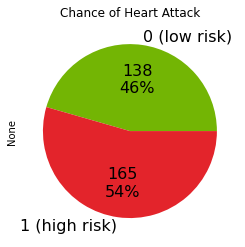

In [15]:
# plot a pie chart of heart attack risk to see the balance
labels = ["0 (low risk)","1 (high risk)"]
df.groupby('chance_of_heart_attack').size()\
    .plot(title='Chance of Heart Attack', kind='pie',autopct=label_function, 
          fontsize=16, colors=['#73b504','#e3242b'], figsize=(plot_small,plot_small), labels=labels)
plt.show()

The high and low risk data is approximately equal

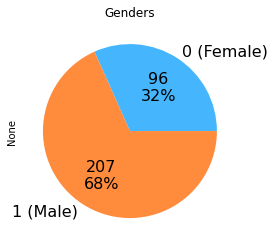

In [16]:
# plot a pie chart of gender to see the balance
labels = ["0 (Female)","1 (Male)"]
df.groupby('Gender').size()\
    .plot(title='Genders', kind='pie', figsize=(plot_small,plot_small), 
          fontsize=16, colors=['#45b6fe','#FF8b3d'], autopct=label_function,labels=labels)
plt.show()

We have twice as many men as women represented in our data. This is discussed in the written report.

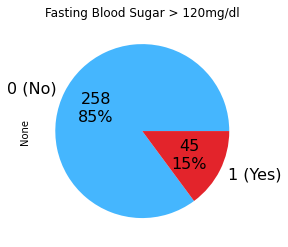

In [17]:
# plot a pie chart of fasting blood sugar to see the balance
labels = ["0 (No)","1 (Yes)"]
df.groupby('Fasting blood sugar > 120mg/dl').size()\
    .plot(title='Fasting Blood Sugar > 120mg/dl', kind='pie', figsize=(plot_small,plot_small), 
          fontsize=16, colors=['#45b6fe','#e3242b'], autopct=label_function,labels=labels)
plt.show()

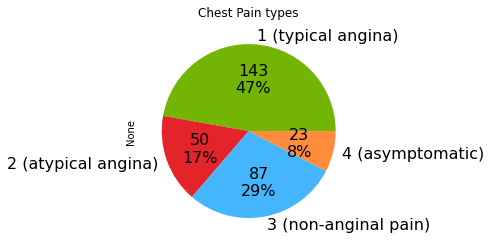

In [18]:
# plot a pie chart of chest pain types to see the breakdown
# chest pain labels taken from dataset link (refer read_csv cell for the link)
labels = ["1 (typical angina)","2 (atypical angina)","3 (non-anginal pain)","4 (asymptomatic)"]
    
df.groupby('Chest pain type').size() \
    .plot(title='Chest Pain types', kind='pie', figsize=(plot_small,plot_small), 
          fontsize=16, colors=['#73b504','#e3242b', '#45b6fe','#FF8b3d'], autopct=label_function, labels=labels)
plt.show()

# Plotting all columns as a boxplot to check outliers

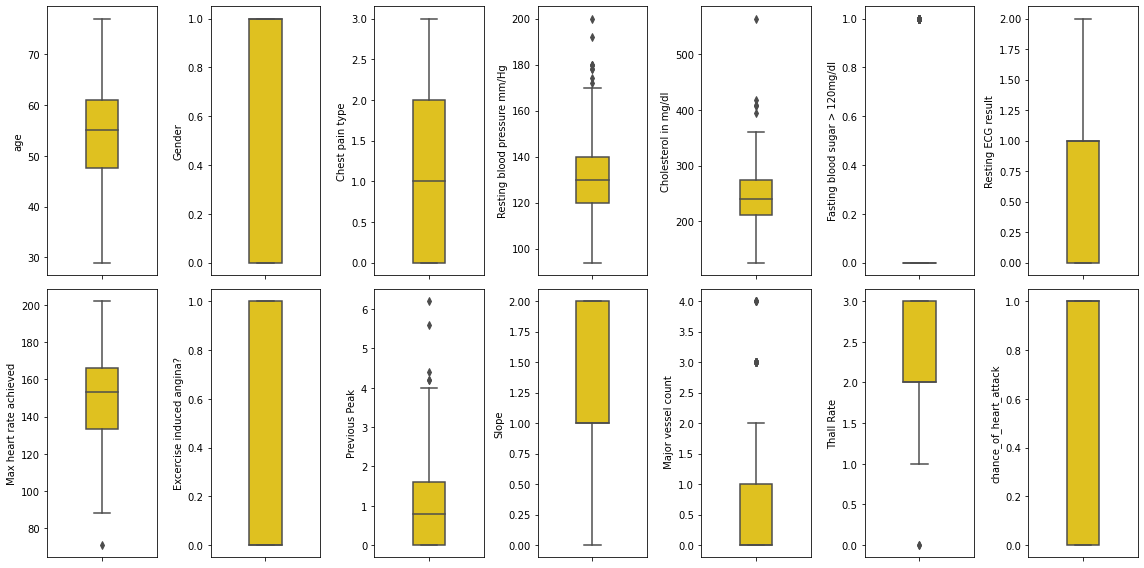

In [19]:
# this code is adapted from the notebook: https://www.kaggle.com/imakash3011/heart-attack-analysis-prediction-90-2

# quickly plot a boxplot for all data to check outliers for the entire dataset
# subplots documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# matplotlib tight_layout() is critical to get this to work = https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = plot_large_rectangle)
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], color="gold", width = 0.3)
    index += 1
fig.tight_layout()

We can see that Resting blood pressure, cholesterol, max heart rate, previous peak, major vessel count and thall rate all have outliers.

# Plotting a heatmap

This simple heatmap plots a correlation of one value to another throughout a dataset.
Pandas `corr()` method does the correlation math. Values close to 1 have a strong positive correlation, values close to -1 have a strong negative correlation. This requires further work to determine if this is the best methodology to plot these values, as producing one value from all the data seems overly simplistic and not fit to derive insights at this stage.

Pandas documentation:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

<AxesSubplot:>

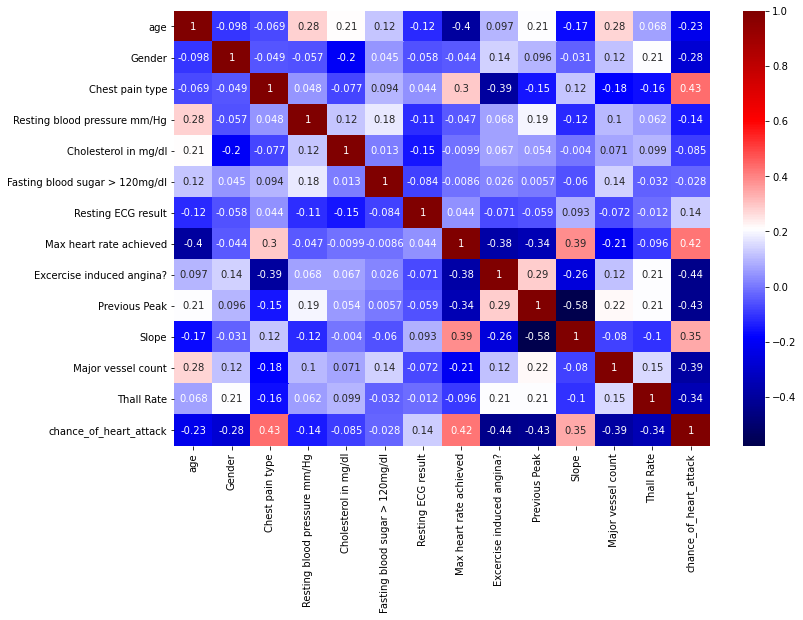

In [20]:
# Seaborn heatmap documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# cmap is the matplotlib colourmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.figure(figsize=(plot_rectangle))
sns.heatmap(df.corr(), annot = True, cmap='seismic')

The strongest positive correlations we can see is the chance of a heart attack vs chest pain type.
The strongest negative correlation we can see is previous peak vs slope.

These metrics may not tell us much in an of themselves, but they can quickly show us some further directions to take our analysis. The heatmap is shown as another example of whats possible in a multivariate dataset with multiple possible causes.

# Plotting a scatter plot matrix 

We want to plot every column of data vs every other column of data to quickly get many visualisations and hopefully visualize relationships in the data. We can do this very quickly using a Seaborn `pairplot`.

A great introduction to the `pairplot` can be found here: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166.
Pairplot documentation can be found here: https://seaborn.pydata.org/generated/seaborn.pairplot.html.

The data should be clean prior to plotting.

`Hue` is the argument name of the variable that is being checked (i.e. the metric of value in our case that is the 'chance of heart attack') - seaborn automatically colours each of hue variable so we can easily visualize groups.

<Figure size 432x288 with 0 Axes>

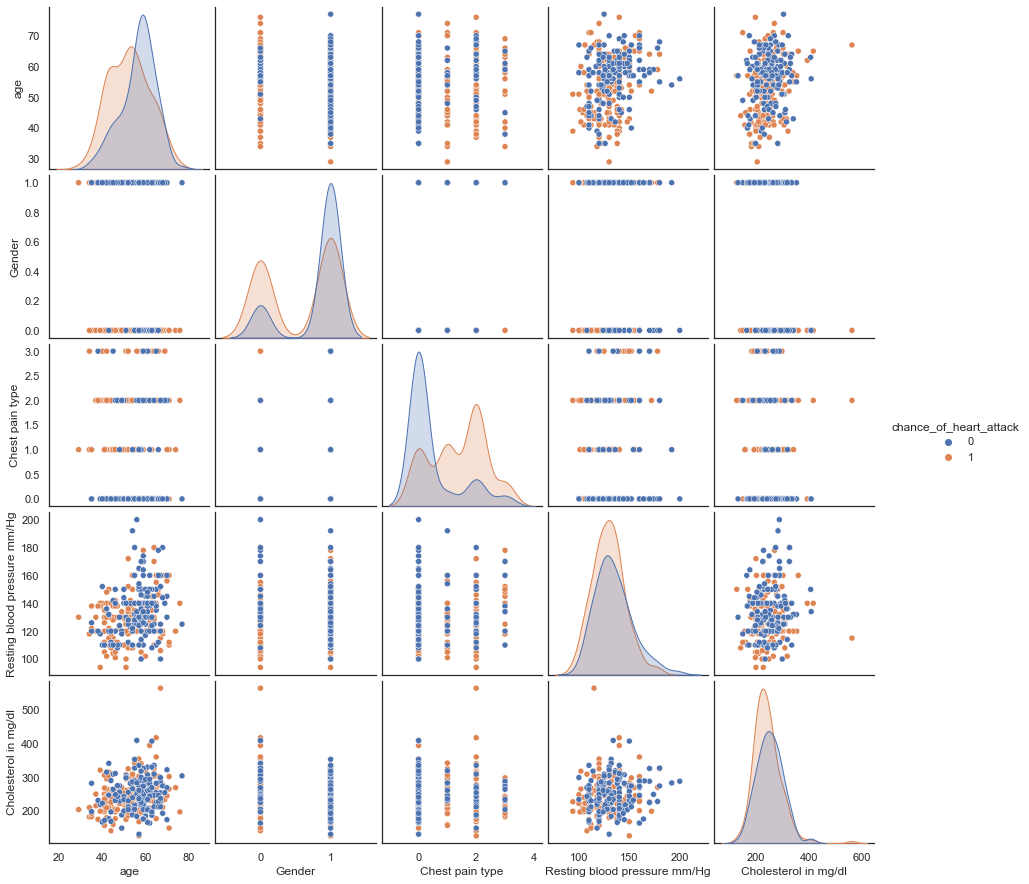

In [21]:
# Setting the figure theme (https://seaborn.pydata.org/generated/seaborn.set_theme.html)
sns.set(style="white")

# plot only the first 5 columns as a pairplot
# explicitly add the 'hue' column to the list of columns to plot
plt.figure()
cols_to_plot = df.columns[:5].tolist() + ['chance_of_heart_attack'] 
sns.pairplot(df[cols_to_plot], hue ="chance_of_heart_attack")
plt.show()

<Figure size 432x288 with 0 Axes>

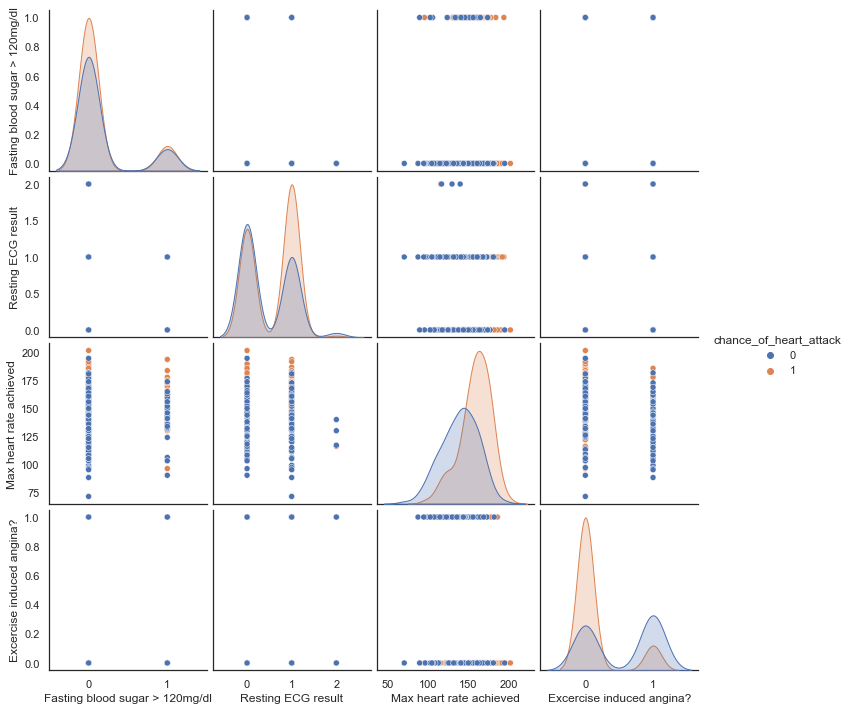

In [22]:
# plot the next 4 columns as a pair plot
plt.figure()
cols_to_plot = df.columns[5:9].tolist() + ['chance_of_heart_attack'] 
sns.pairplot(df[cols_to_plot], hue ="chance_of_heart_attack")
plt.show()

<Figure size 432x288 with 0 Axes>

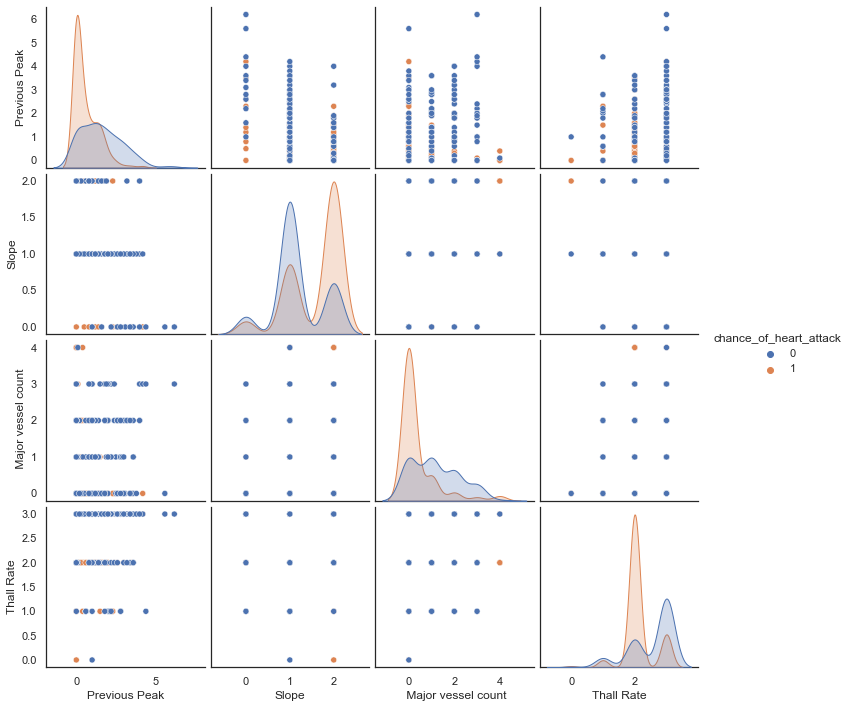

In [23]:
# plot the last 4 columns as a pairplot
plt.figure()
cols_to_plot = df.columns[9:13].tolist() + ['chance_of_heart_attack'] 
sns.pairplot(df[cols_to_plot], hue ="chance_of_heart_attack")
plt.show()

We will now produce only a kernal density estimation plot instead of scatter plots for all columns.

Kernel Density estimation (KDE) "smoothes" out a random dataset by estimating the probability of a given density. If you are new to data analysis i found this brief video to be good to explain KDE at a high level. https://www.youtube.com/watch?v=qc9elACH8LA

We do our KDE plots using the probability of a heart attack as the third variable to plot as this is the main metric of value inside this dataset.

<Figure size 432x288 with 0 Axes>

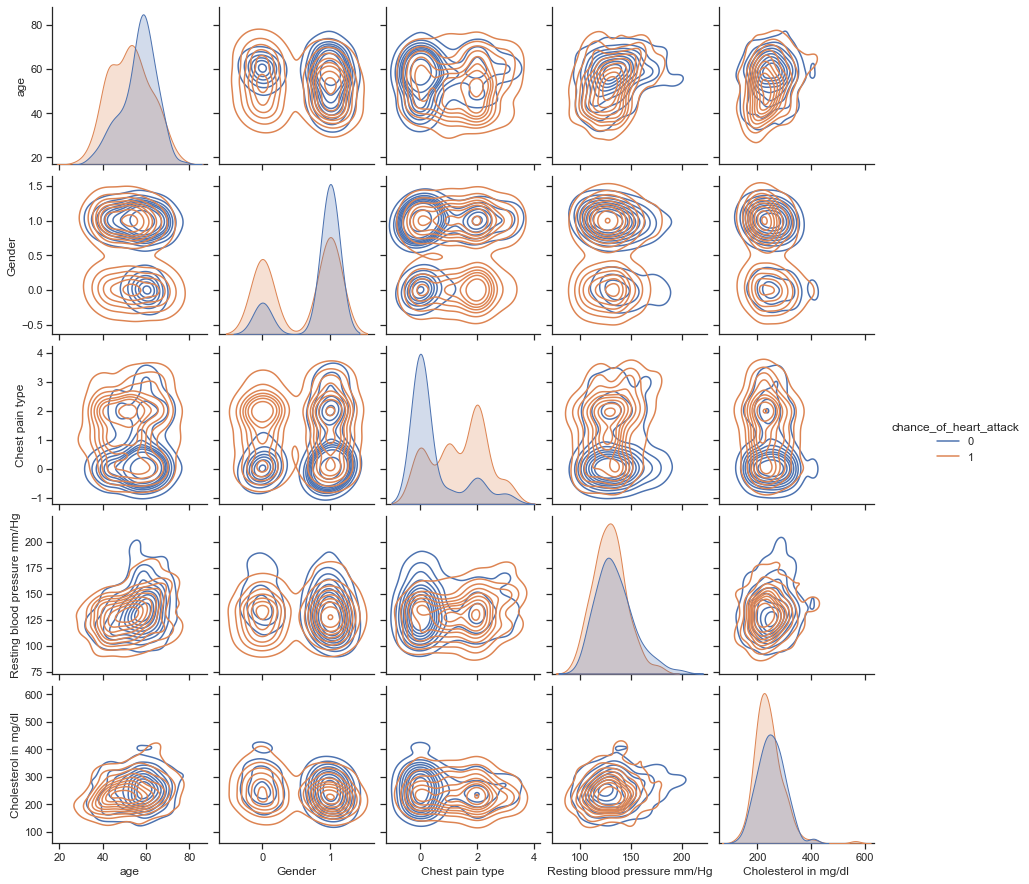

In [24]:
sns.set(style="ticks")
plt.figure()
cols_to_plot = df.columns[:5].tolist() + ['chance_of_heart_attack'] 
sns.pairplot(df[cols_to_plot], hue ="chance_of_heart_attack", kind = 'kde')
plt.show()

<Figure size 432x288 with 0 Axes>

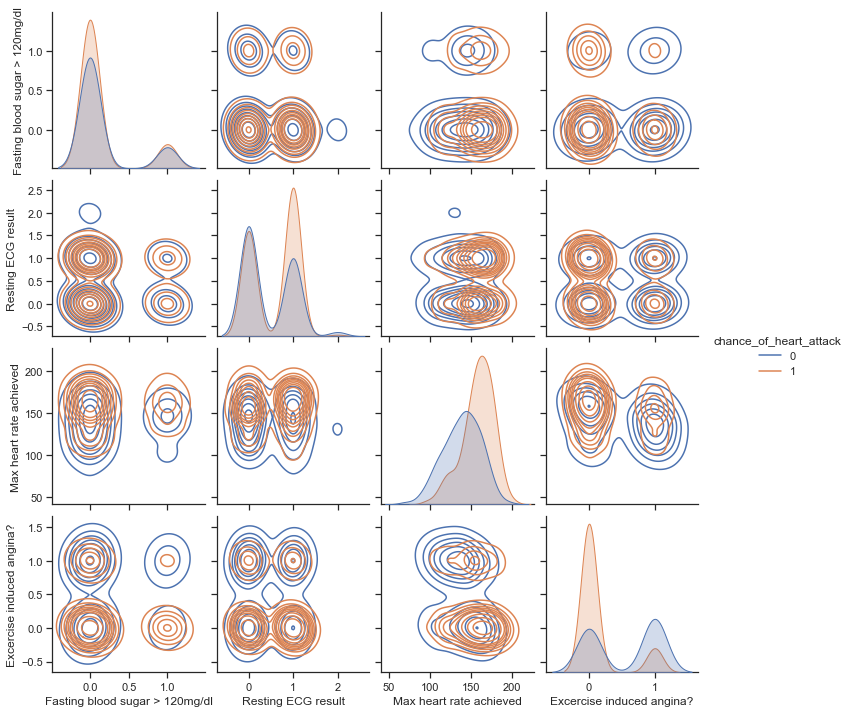

In [25]:
sns.set(style="ticks")
plt.figure()
cols_to_plot = df.columns[5:9].tolist() + ['chance_of_heart_attack'] 
sns.pairplot(df[cols_to_plot], hue ="chance_of_heart_attack", kind = 'kde')
plt.show()

<Figure size 432x288 with 0 Axes>

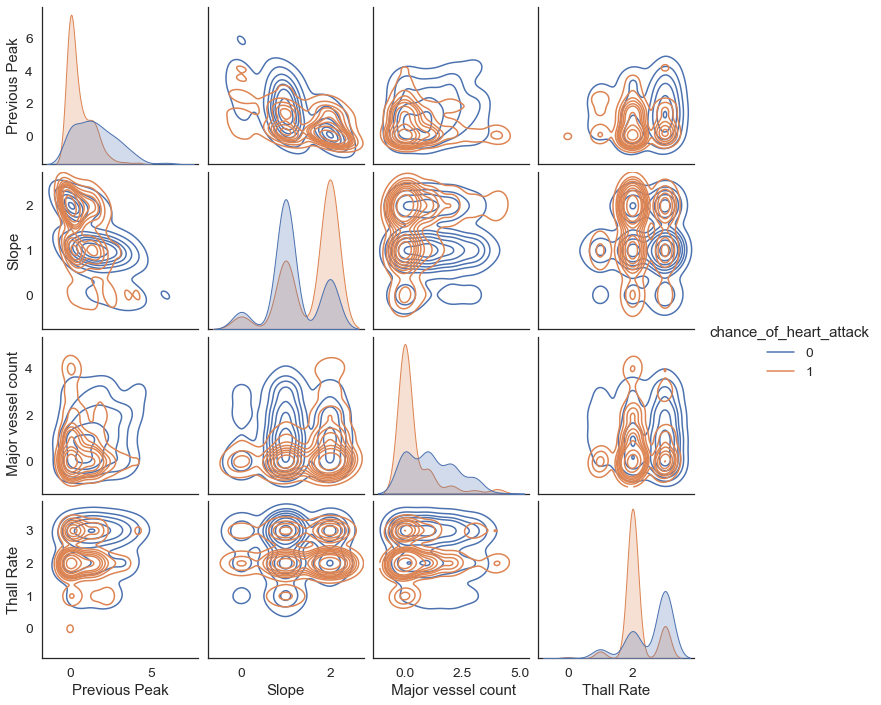

In [26]:
sns.set_theme(style='white', font_scale=1.25)

plt.figure()
cols_to_plot = df.columns[9:13].tolist() + ['chance_of_heart_attack'] 
sns.pairplot(df[cols_to_plot], hue ="chance_of_heart_attack", kind = 'kde')
plt.show()

# Plotting a scatter plot with a fitted trend line

Now we want to complete a scatter plot and see if a trend line can be established between the two chosen factors.

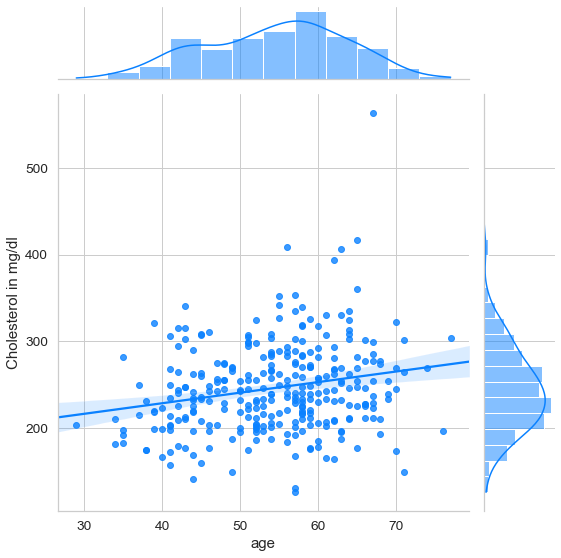

In [27]:
# Report plot 1
# make a scatter plot with KDE plots for each axis as well to see outliers
# increase the font size for easier reading
# also make the plot style a grid for easier referencing
sns.set_theme(color_codes=True, style='whitegrid', font_scale=1.25)
g = sns.jointplot(y="Cholesterol in mg/dl", x="age", data=df, 
                  kind="reg", truncate=False,
                  color="#0a81ff", height=plot_height)                  

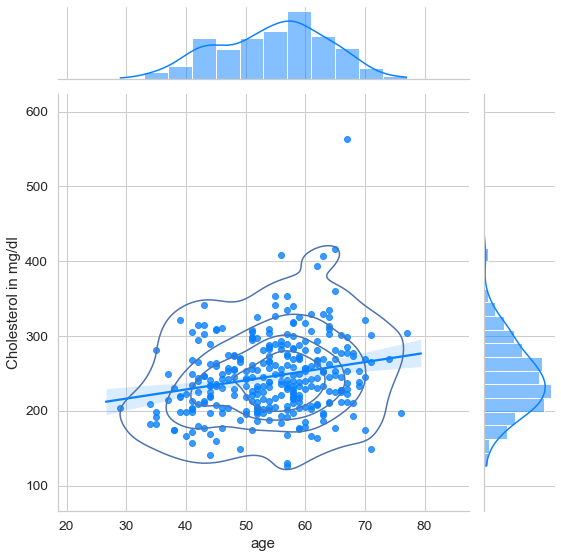

In [28]:
# same plot as cell above, however adding a KDE plot on top of the scatter plot
sns.set_theme(color_codes=True, style='whitegrid', font_scale=1.25)
g = sns.jointplot(y="Cholesterol in mg/dl", x="age", data=df, kind="reg", truncate=False,
                  color="#0a81ff", height=plot_height).plot_joint(sns.kdeplot, n_levels=5)

The above plot generated the metric using aggregated data for the whole dataset. A discussion of outliers is completed in the written report.

We want to add the "metric of value" (chance of a heart attack) to the graph now, and see if any it reveals any new insights.

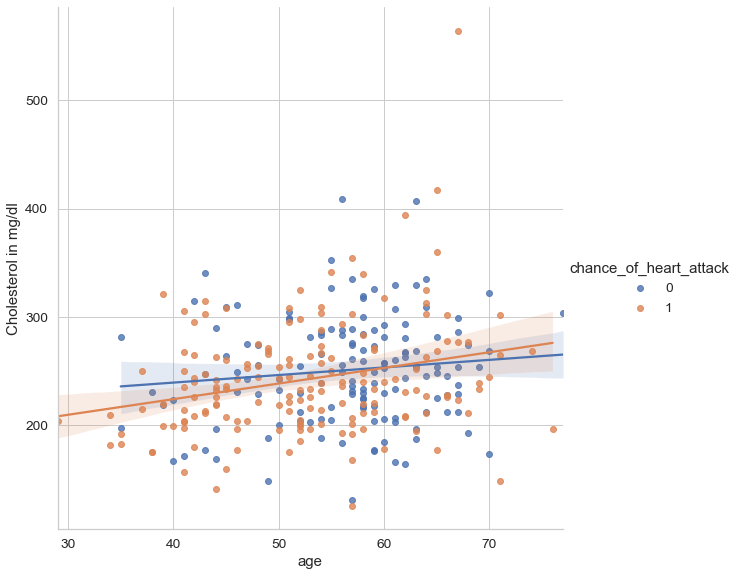

In [29]:
# Report plot 2
# now seperate the above plot by the chance of a heart attack
# seaborn documentation: https://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.set_theme(color_codes=True, style='whitegrid', font_scale=1.25)
g = sns.lmplot(data=df, y="Cholesterol in mg/dl", x="age", hue='chance_of_heart_attack', height=plot_height)

The fitted trend line is an awful way to try to represent this data as there is a broad spread on both axes. We will attempt to resolve this by plotting a more useful graph.

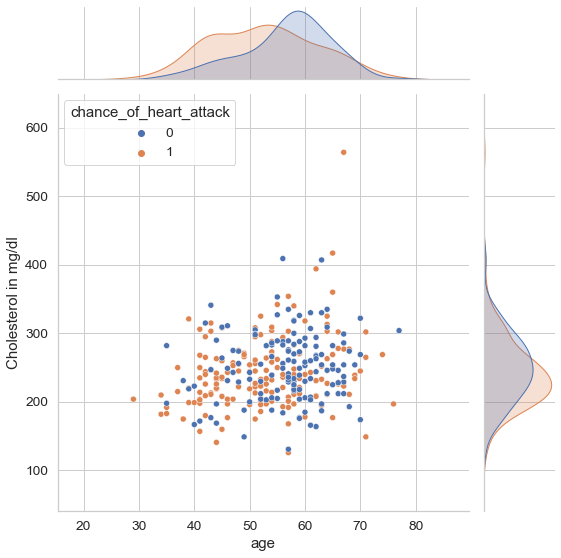

In [30]:
# Report plot 3
# now replot the above plot with KDE graphs on each axis for further insights
# seaborn documentation: https://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.set_theme(color_codes=True, style='whitegrid', font_scale=1.25)
g = sns.jointplot(data=df, y="Cholesterol in mg/dl", x="age", hue='chance_of_heart_attack', height=plot_height)

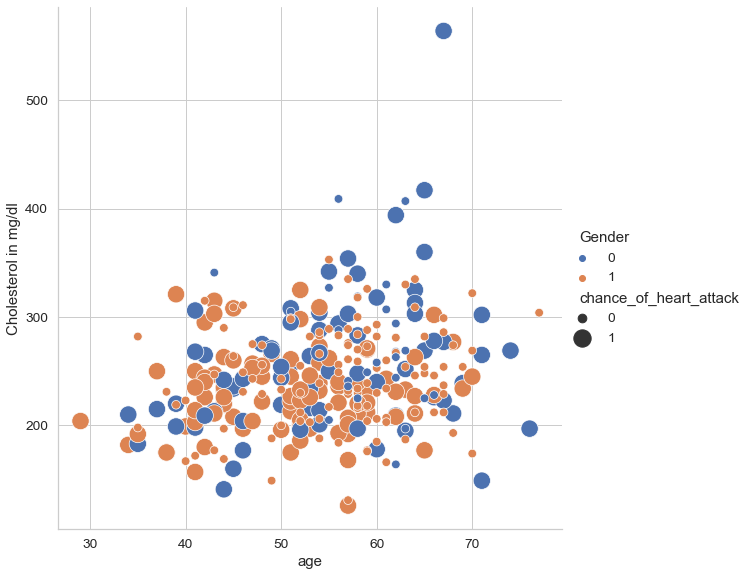

In [31]:
# report plot 4
# plot 4 variables in one graph to attempt to find causal factors
# https://seaborn.pydata.org/generated/seaborn.relplot.html
datapoint_sizes = [75, 300]
sns.relplot(y="Cholesterol in mg/dl", x="age", size="chance_of_heart_attack",  
            height=plot_height, sizes=(datapoint_sizes), data=df, hue = 'Gender')

The 4 factor relplot above is discussed at length in the Chapter 5 report.

# Make a more useful plot than fitted trend line to map relationships

This section is discussed in more detail in the "problem solving" section of the written report.

We will produce other plot styles that allow us to more effectively visualize the scatter plot instead of a fitted trend line. Since we want to compare Male and Female cholesterol levels, we will check how many of each Gender we have in the dataset.

The 'report plot' numbers shown above any plot is used to cross reference plot numbers within the written report.

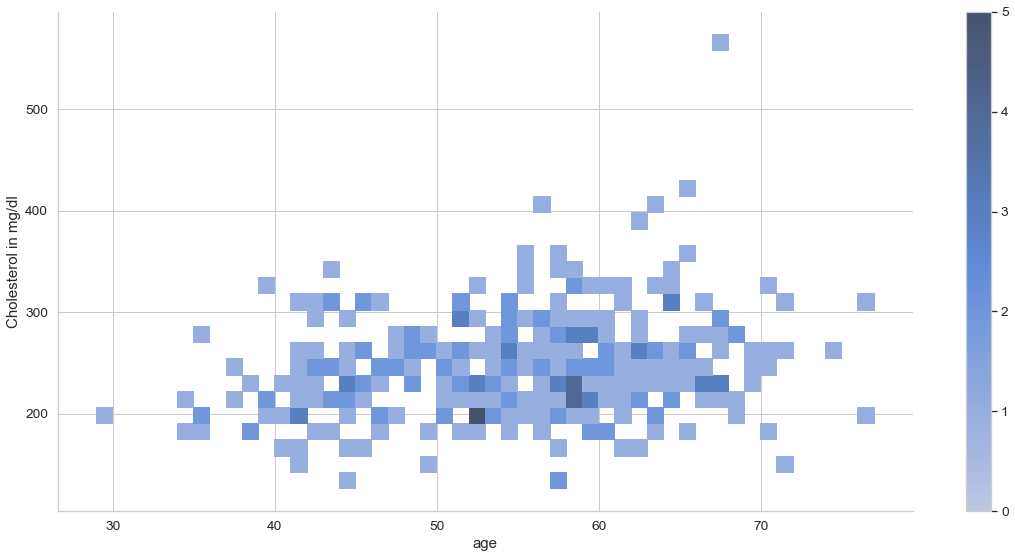

In [32]:
# Report plot 5
# Seaborn displot can be used for bivariate data : https://seaborn.pydata.org/generated/seaborn.displot.html
# we will plot firstly without gender data to see how the data looks
# the binwidth argument allows us to tweak the size of the squares for both axes
sns.set_theme(color_codes=True, style='whitegrid', font_scale=1.25)
sns.displot(df, y="Cholesterol in mg/dl", x="age", height=plot_height, aspect=2, binwidth=(1,16), cbar=True)

Firstly, we can see several similar peaks, possibly due to gender differences. We will plot again and include gender on the plot.

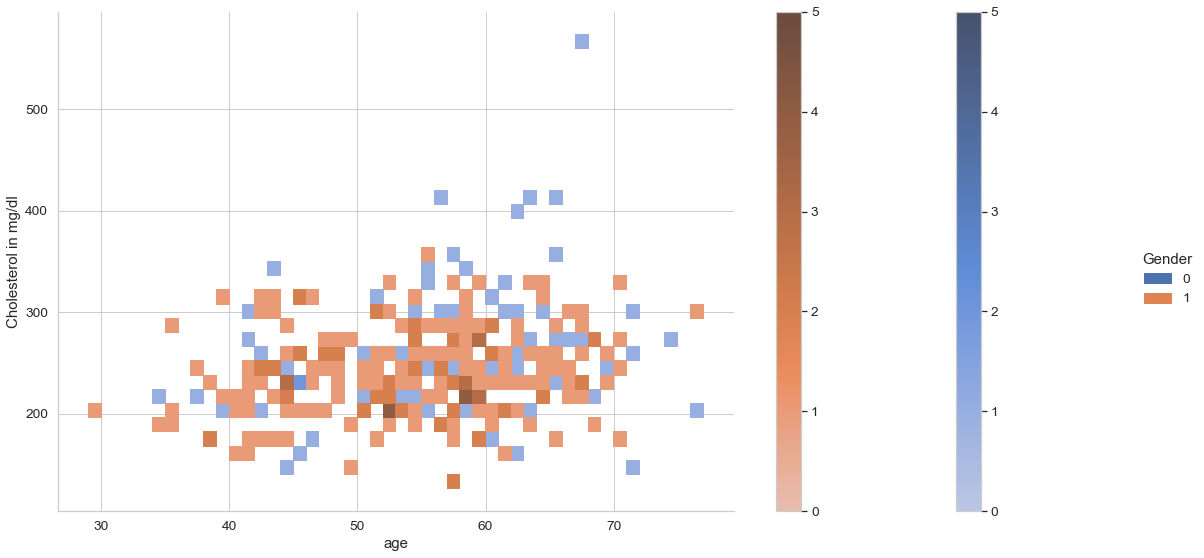

In [33]:
# Report plot 6
# now we want to plot gender onto the graph for further insights by using the hue metric
# displot has no width variable, so we change the aspect ratio to help with rectangular presentation
# a colour bar is added to map colour to density
sns.set_theme(color_codes=True, style='whitegrid', font_scale=1.25)
sns.displot(df, y="Cholesterol in mg/dl", x="age", hue="Gender", height=plot_height, aspect=2, binwidth=(1, 14), cbar=True)

Now we can barely see any female data (blue) because the two datasets overlap so much! We will repeat these plots using KDE plots which 'smoothe out' the datapoints, effectively giving us a mathematical probability of one variable if we know the other variable.

Since this graph shows all data, we will now specify a third factor to gain more insights, this time we will see the different in cholesterol by age for Males and Females.

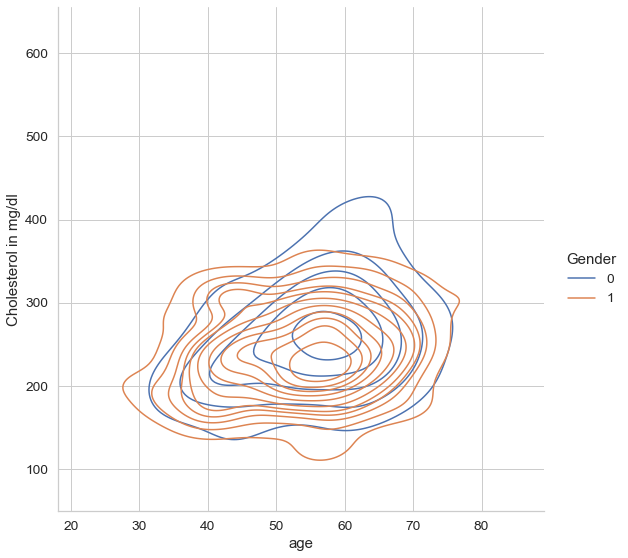

In [34]:
# Report plot 7
# alter the levels to show more or less 
# the 'hue' value is the third metric, in this case, Gender.
sns.displot(df, y="Cholesterol in mg/dl", x="age", hue="Gender", kind='kde', height=plot_height, levels=12)

In [35]:
# create a new dataframe and remove cholesterol outliers,
# this is to check high cholesterol outliers for females arent distorting the plot, and therefore the findings
normal_cholesterol_df = df[df['Cholesterol in mg/dl'] < 380]

# check the new size of the dataframe
normal_cholesterol_df.shape

(298, 14)

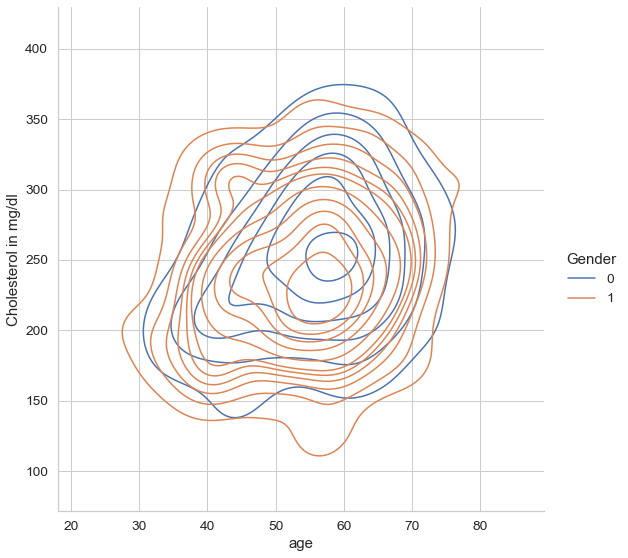

In [36]:
# Report plot 8
# Cholesterol outliers removed into a new dataframe to check if they are distorting the plot
sns.displot(normal_cholesterol_df, y="Cholesterol in mg/dl", x="age", hue="Gender", kind='kde', height=plot_height, levels=12)

The insights from this visualisation are covered within the report.


We will look into other ways to visualize this data.

<AxesSubplot:xlabel='age', ylabel='Cholesterol in mg/dl'>

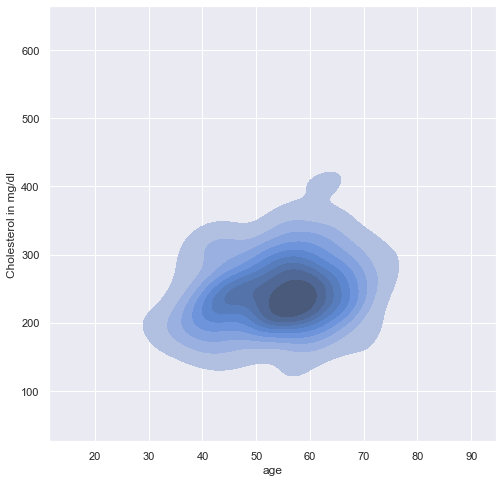

In [37]:
# Report plot 9
# a kdeplot produced for the overall dataset for comparison to displot labelled "Report plot 5"
# a KDE plot will plot a KDE graph for the specified axes
# kdeplot function doesnt have a size argument to tweak plot size, this first line of code will size the plot
sns.set(rc={'figure.figsize':(plot_height, plot_height)})
sns.kdeplot(df.age, df['Cholesterol in mg/dl'], shade=True, cut=5)

# Creating a new categorical data column

We can take a column of data and catagorize it to enable us to different types of plots. 

For this purpose we will demonstrate on a numerical column - in this instance the "Resting blood pressure mm/Hg". This column is being used as it can be easily divided into subgroups of data. Furthermore, this metric has knowable minimum and maximum values defined by the limits of the human body.

We can see from using `df.describe().T` in a cell above that the minimum in this dataset is 94 and the maximum is 200. We will create some categories either side of these values to attempt to future proof this column.

We will create a new column to store our derived data using the pandas `cut` function.
Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html. 

In [38]:
# The bin widths to be used
bins = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]

# The labels for each bin (needs to be one less than total bin count!)
categories = ['30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', 
              '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180',
              '180-190', '190-200', '200-210', '210-220']

# take the existing Resting BP column, divide up as per 'bins' parameters above
# then generate a new column and categorize the new column based on existing dataframe data
df['Blood pressure band'] = pd.cut(df['Resting blood pressure mm/Hg'], bins, labels=categories)

In [39]:
# check the new 'Blood pressure band' column has been added to the dataframe
df.head()

,age,Gender,Chest pain type,Resting blood pressure mm/Hg,Cholesterol in mg/dl,Fasting blood sugar > 120mg/dl,Resting ECG result,Max heart rate achieved,Excercise induced angina?,Previous Peak,Slope,Major vessel count,Thall Rate,chance_of_heart_attack,Blood pressure band
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,140-150
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,120-130
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,120-130
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,110-120
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,110-120


# Pivot Table Examples

A pivot table is an easy way to summarize large amounts of data that has already been categorized, allowing us to gain insights quickly. 

If you are new to pivot tables, this youtube video gives a brief introduction into pivot tables : https://www.youtube.com/watch?v=GCeYCGzmqN4

Pivot tables can be executed in pandas using the `pivot_table()` function.
Documentation : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html. The "values" argument has to be a numeric column.

In [40]:
# create a pivot table. The 'values' argument must be numeric.
# aggfunc is the method of calculating the 'value' column within the 'index' bands.
# Note the index entry order matters - it determines the plot order of the pivot table,
# so experiment with the 'index' argument order to see different data arrangements.
# note the aggfunc is 'max' (to record the max heartrate), we can load any mathematrical function as the aggfunc method, even from other libraries e.g. scipy.stats

pd.pivot_table(df, values=['Max heart rate achieved'], \
                        index=['Blood pressure band'], aggfunc='max') \
                    .rename(columns={'Max heart rate achieved': 'Max heart-rate within this band'})

,Max heart-rate within this band
Blood pressure band,
90-100,179
100-110,177
110-120,194
120-130,202
130-140,186
140-150,178
150-160,181
160-170,159
170-180,165


In [41]:
# plot multiple columns as a pivot table. 
# note the aggfunc is 'numpy.mean' (to give us the average heartrate)
# use the .rename() function to relabel the column to reflect the aggfunc methods calculation
# .round() rounds the number to be easier to read
pd.pivot_table(df, values=['Max heart rate achieved'], \
                            index=['Chest pain type', 'Blood pressure band'], aggfunc=np.mean) \
                    .rename(columns={'Max heart rate achieved': 'Average heart-rate within this band'}) \
                    .round(1)

Average heart-rate within this band
Chest pain type Blood pressure band                                     
0               90-100                                             134.3
                100-110                                            142.2
                110-120                                            137.3
                120-130                                            141.4
                130-140                                            147.3
                140-150                                            135.4
                150-160                                            134.2
                160-170                                            125.0
                170-180                                            144.8
                190-200                                            133.0
1               100-110                                            162.2
                110-120                                            160.2
                120-130                                            168.5
                130-140                                            158.6
                150-160                                            147.2
                190-200                                            195.0
2               90-100                                             158.7
                100-110                                            152.4
                110-120                                            155.1
                120-130                                            153.4
                130-140                                            160.2
                140-150                                            158.1
                150-160                                            149.3
                170-180                                            156.0
3               100-110                                            138.0
                110-120                                            177.0
                120-130                                            125.0
                130-140                                            162.0
                140-150                                            155.0
                150-160                                            144.7
                160-170                                            157.0
                170-180                                            145.0

In [42]:
# complete another pivot table, this time change the aggfunc to 'median' for comparison
pd.pivot_table(df, values=['Max heart rate achieved'], \
                            index=['Chest pain type', 'Blood pressure band'], aggfunc='median')\
                    .rename(columns={'Max heart rate achieved': 'Median heartrate within this band'})

Median heartrate within this band
Chest pain type Blood pressure band                                   
0               90-100                                           125.0
                100-110                                          143.0
                110-120                                          140.0
                120-130                                          143.0
                130-140                                          151.0
                140-150                                          136.5
                150-160                                          141.5
                160-170                                          132.0
                170-180                                          148.5
                190-200                                          133.0
1               100-110                                          162.0
                110-120                                          169.0
                120-130                                          171.5
                130-140                                          160.0
                150-160                                          152.5
                190-200                                          195.0
2               90-100                                           154.0
                100-110                                          156.0
                110-120                                          159.0
                120-130                                          152.0
                130-140                                          164.0
                140-150                                          158.5
                150-160                                          150.5
                170-180                                          156.0
3               100-110                                          138.0
                110-120                                          178.0
                120-130                                          125.0
                130-140                                          162.0
                140-150                                          162.0
                150-160                                          131.0
                160-170                                          157.0
                170-180                                          145.0